# 사전 지식

진자는 우리 생활에서 흔히 볼 수 있으며 간단한 모델로 설명할 수 있다는 장점으로 인해 많은 물리학 교과서에서 등장하곤 합니다. 하지만 진자에 다른 진자가 연결된 형태의 **이중 진자**를 설명하기 위해서는 훨씬 더 복잡한 형태의 모델이 필요합니다. 이에 대한 물리학적인 이론은 이 문제의 범위를 벗어납니다. 자세한 내용은 Fowles나 Marion 등의 고전역학 교재를 참조하세요. 그래도 [이 기사](https://www.ksakosmos.com/post/%EC%9D%B4%EC%A4%91-%EC%A7%84%EC%9E%90%EC%99%80-%EB%9D%BC%EA%B7%B8%EB%9E%91%EC%A7%80%EC%95%88) 정도는 한 번 읽어보시는 것을 권장합니다.

![이중 진자](https://w.namu.la/s/0207156d8107947e6576359ab82d2bfef87b926011af5585b005470a3185e63a0cc7f71796db992e6c7f7dde7a265e2cdfc9ca542aaf370d669eb78e0ea021aa625c2854e8a2aadf708362b8d2073cfbaf92d20fcfc4d973c302e313187417deec640be41f323850c17bdeb8f03c7938)

위의 변수를 따르는 이중 진자의 운동은 아래의 미분방정식을 따릅니다:

$$
\displaystyle \begin{aligned} \theta_{1}&:\,(m_{1}+m_{2})l_{1}\ddot{\theta}_{1}+m_{2}l_{2}\ddot{\theta}_{2}\cos{(\theta_{1}-\theta_{2})}+m_{2}l_{2}\dot{\theta}_{2}^{2}\sin{(\theta_{1}-\theta_{2})}+(m_{1}+m_{2})g\sin{\theta_{1}}=0 \\ \theta_{2}&:\,m_{2}l_{2}\ddot{\theta}_{2}+m_{2}l_{1}\ddot{\theta_{1}}\cos{(\theta_{1}-\theta_{2})}-m_{2}l_{1}\dot{\theta}_{1}^{2}\sin{(\theta_{1}-\theta_{2})}+m_{2}g\sin{\theta_{2}}=0 \end{aligned}
$$

미분방정식의 수치해를 구하는 것은 수치해석학의 주된 주제 중 하나입니다. 이론적인 부분에 관심을 가지고 계신 분들은 한국과학영재학교의 미분방정식 과목을 수강하거나, 수치해석학 교재를 참조하세요. 이 문제에서는 수치해석학 이론을 구현해 놓은 `scipy.integrate` 모듈의 사용법에 초점을 맞춥니다.

# 문제

다음과 같이 동작하는 함수 `double_pendulum`을 작성하시오:

- 입력: 없음(하지만 먼저 정의되어 있는 수치들을 사용해야 함)
- 출력: 미분방정식의 수치해가 저장된 시간 `t`, 이때 무게가 $m_1$인 진자의 위치 `x_1`, `y_1`, 무게가 $m_2$인 진자의 위치 `x_2`, `y_2`

> **주의 사항** 
> 
> 코드를 실행하기에 앞서 `%matplotlib notebook` 셀을 실행하는 것을 잊지 마세요! 애니메이션이 정상적으로 표시되려면 꼭 필요합니다.

In [5]:
%matplotlib notebook

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


############ 시뮬레이션 설정값 ############
g = 9.80665
l_1, l_2 = 1.0, 1.0
m_1, m_2 = 1.0, 1.0

start = 0
step = 0.01
stop = 10

theta_1, theta_2 = 90, 30
omega_1, omega_2 = 0, 0
########################################


# 여기에 코드를 작성하세요
def double_pendulum():
    return [], [], [], [], []



########################################
# 애니매이션 구동 코드 - 수정하지 마세요
t, x_1, y_1, x_2, y_2 = double_pendulum()

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    x = [0, x_1[i], x_2[i]]
    y = [0, y_1[i], y_2[i]]

    line.set_data(x, y)
    time_text.set_text(time_template % (i * step))
    return line, time_text


ani = FuncAnimation(fig, animate, range(1, len(t)), interval=step*1000, blit=True, init_func=init)
plt.show()

<IPython.core.display.Javascript object>


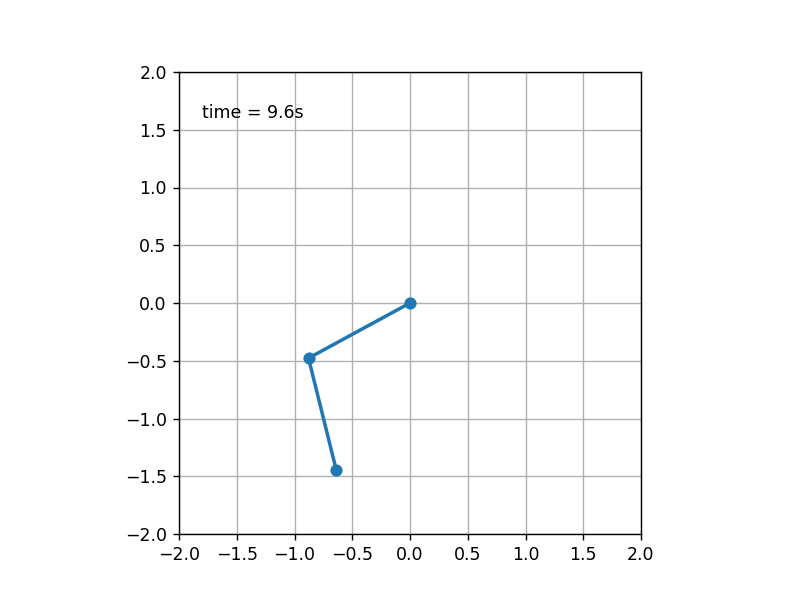

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


g = 9.80665
l_1, l_2 = 1.0, 1.0
m_1, m_2 = 1.0, 1.0

start = 0
step = 0.01
stop = 10

theta_1, theta_2 = 90, 30
omega_1, omega_2 = 0, 0


def double_pendulum():
    t = np.arange(start, stop, step)
    init_state = np.array([theta_1, omega_1, theta_2, omega_2]) * np.pi / 180

    def deriv(time, state):
        theta_1, omega_1, theta_2, omega_2 = state

        d = theta_2 - theta_1

        dw1dt = (
            m_2 * l_1 * omega_1 ** 2 * np.sin(d) * np.cos(d)
            + m_2 * g * np.sin(theta_2) * np.cos(d)
            + m_2 * l_2 * omega_2 ** 2 * np.sin(d) 
            - (m_1 + m_2) * g * g * np.sin(theta_1)
        ) / (
            (m_1 + m_2) * l_1
            - m_2 * l_1 * np.cos(d) ** 2
        )

        dw2dt = (
            -m_2 * l_2 * omega_2 ** 2 * np.sin(d) * np.cos(d)
            + (m_1 + m_2) * (
                g * np.sin(theta_1) * np.cos(d)
                - l_1 * omega_1 ** 2 * np.sin(d)
                - g * np.sin(omega_2))
        ) / (
            (m_1 + m_2) * l_2
            - m_2 * l_2 * np.cos(d) ** 2
        )

        dth1dt, dth2dt = omega_1, omega_2

        return np.array([dth1dt, dw1dt, dth2dt, dw2dt])

    sol = solve_ivp(deriv, (start, stop), init_state, t_eval=t)

    x_1 = l_1 * np.sin(sol.y[0])
    y_1 = -l_1 * np.cos(sol.y[0])

    x_2 = l_2 * np.sin(sol.y[2]) + x_1
    y_2 = -l_2 * np.cos(sol.y[2]) + y_1

    return t, x_1, y_1, x_2, y_2

t, x_1, y_1, x_2, y_2 = double_pendulum()

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    x = [0, x_1[i], x_2[i]]
    y = [0, y_1[i], y_2[i]]

    line.set_data(x, y)
    time_text.set_text(time_template % (i * step))
    return line, time_text


ani = FuncAnimation(fig, animate, range(1, len(t)), interval=step*1000, blit=True, init_func=init)
plt.show()